Project On Pizza Sales:----

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#to first call all the files.

orders = pd.read_csv("orders.csv")            
orders.head()

order_details = pd.read_csv("order_details.csv")
order_details.head()

pizza_types = pd.read_csv("pizza_types.csv", encoding='unicode_escape')
pizza_types.head()

pizzas = pd.read_csv("pizzas.csv")
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [5]:
#to check the info and datatype in all the files:---

orders.info()
orders["date" ] = orders["date"].astype("datetime64[ns]")    #to change the datatype
orders["time" ] = orders["time"].astype("datetime64[ns]")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_4568\736603112.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["time" ] = orders["time"].astype("datetime64[ns]")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [7]:
#to check the isnull().sum for null values in all the files:---

In [8]:
orders.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

Now let us find the answers of some questions:-

1. Total Sales

In [9]:
ts = pd.merge(left = order_details, right = pizzas, on = "pizza_id", how = "inner")
ts.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25


In [10]:
ts["sales"] = ts["quantity"] * ts["price"]
ts.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25


In [11]:
print("Total Sales: ", ts["sales"].sum())    #total sales.

Total Sales:  817860.0499999999


2. Identify which pizza is ordered the most.

In [12]:
po = pd.merge(left = pizza_types, right = ts, on = "pizza_type_id", how = "inner" )
po.head()

,pizza_type_id,name,category,ingredients,order_details_id,order_id,pizza_id,quantity,size,price,sales
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",11,6,bbq_ckn_s,1,S,12.75,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",239,102,bbq_ckn_s,1,S,12.75,12.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",294,124,bbq_ckn_s,1,S,12.75,12.75
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",458,194,bbq_ckn_s,1,S,12.75,12.75
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",489,208,bbq_ckn_s,1,S,12.75,12.75


In [13]:
gb = po.groupby("name").agg({"order_id":"count"})
gb

,order_id
name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [14]:
print("The Pizza ordered the most is: ", gb["order_id"].idxmax())

The Pizza ordered the most is:  The Classic Deluxe Pizza


3. Identify which pizza category is hotselling.

In [15]:
gb = po.groupby("category").agg({"order_id":"count"})
gb

,order_id
category,
Chicken,10815
Classic,14579
Supreme,11777
Veggie,11449


In [16]:
print("The Pizza Category which is hotselling is: ", gb["order_id"].idxmax())

The Pizza Category which is hotselling is:  Classic


4. Identify which pizza is generating more sales.

In [17]:
gb = po.groupby("name").agg({"sales": "sum"})
gb

,sales
name,
The Barbecue Chicken Pizza,42768.00
The Big Meat Pizza,22968.00
The Brie Carre Pizza,11588.50
The Calabrese Pizza,15934.25
The California Chicken Pizza,41409.50
The Chicken Alfredo Pizza,16900.25
The Chicken Pesto Pizza,16701.75
The Classic Deluxe Pizza,38180.50
The Five Cheese Pizza,26066.50


In [18]:
print("Pizza generating more sales is: ", gb["sales"].idxmax())

Pizza generating more sales is:  The Thai Chicken Pizza


5. Identify which day of the week we are getting the highest orders.

In [29]:
orders.head()

,order_id,date,time
0,1,2015-01-01,2023-10-14 11:38:36
1,2,2015-01-01,2023-10-14 11:57:40
2,3,2015-01-01,2023-10-14 12:12:28
3,4,2015-01-01,2023-10-14 12:16:31
4,5,2015-01-01,2023-10-14 12:21:30


In [6]:
orders["weekday"] = orders["date"].dt.strftime("%A")
orders.head()

,order_id,date,time,weekday
0,1,2015-01-01,2023-10-15 11:38:36,Thursday
1,2,2015-01-01,2023-10-15 11:57:40,Thursday
2,3,2015-01-01,2023-10-15 12:12:28,Thursday
3,4,2015-01-01,2023-10-15 12:16:31,Thursday
4,5,2015-01-01,2023-10-15 12:21:30,Thursday


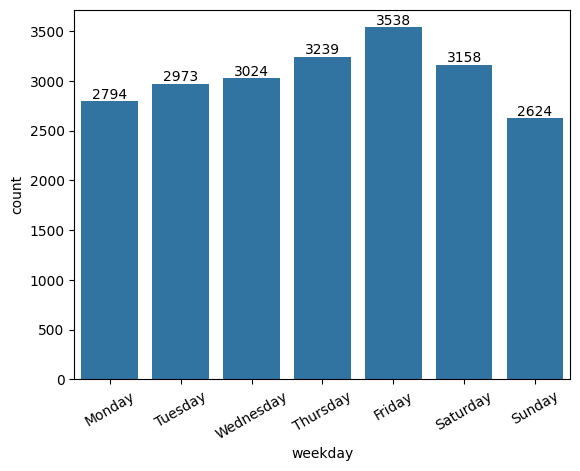

In [61]:
day = sns.countplot(data = orders, x = "weekday", order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
day.bar_label(day.containers[0])    #to show the values.
plt.xticks(rotation = 30)
plt.show()

The Day on which we are getting highest order is: Friday.

6. Identify the time at which we are getting highest orders and the time at which we are getting the lowest orders.

In [7]:
orders["hours"] = orders["time"].dt.strftime("%H")
orders.head()

,order_id,date,time,weekday,hours
0,1,2015-01-01,2023-10-15 11:38:36,Thursday,11
1,2,2015-01-01,2023-10-15 11:57:40,Thursday,11
2,3,2015-01-01,2023-10-15 12:12:28,Thursday,12
3,4,2015-01-01,2023-10-15 12:16:31,Thursday,12
4,5,2015-01-01,2023-10-15 12:21:30,Thursday,12


In [8]:
gb = orders.groupby("hours").agg({"order_id": "count"})
gb

,order_id
hours,
09,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


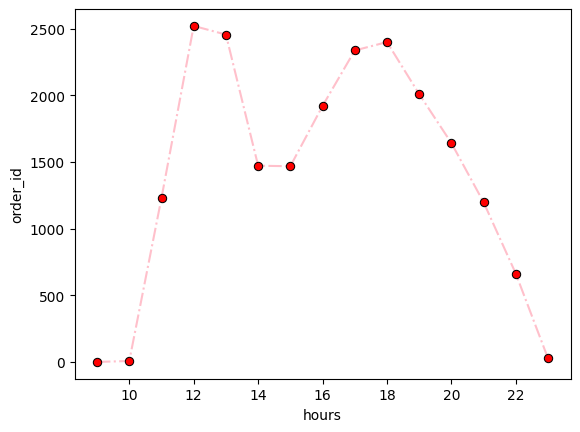

In [72]:
#will plot line chart to show the time.

sns.lineplot(data = gb, x = gb.index , y = gb["order_id"], marker = "o", linestyle = "-.", color = "pink", mec = "black", mfc = "red")
plt.show()

The time at which we are getting highest orders is 12 hours, and the time at which we are getting the lowest orders is 9 hours.

7. Identify at which time of the day, people are ordering more pizzas.(morning/evening/afternoon/night).

In [73]:
orders.head()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     21350 non-null  int64         
 1   date         21350 non-null  datetime64[ns]
 2   time         21350 non-null  datetime64[ns]
 3   weekday      21350 non-null  object        
 4   hours        21350 non-null  int64         
 5   time_period  21350 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 1000.9+ KB


In [10]:
orders["hours"] = orders["hours"].astype("int64")

In [11]:
orders.loc[(orders["hours"] < 12), "time_period"]  = "Morning"
orders.loc[((orders["hours"] >= 12) & (orders["hours"] < 17 )), "time_period"] = "Afternoon"
orders.loc[((orders["hours"] >= 17) & (orders["hours"] < 21 )), "time_period"] = "Evening"
orders.loc[(orders["hours"] >= 21), "time_period"] = "Night"
orders.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_4568\1526613230.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  orders.loc[(orders["hours"] < 12), "time_period"]  = "Morning"


,order_id,date,time,weekday,hours,time_period
0,1,2015-01-01,2023-10-15 11:38:36,Thursday,11,Morning
1,2,2015-01-01,2023-10-15 11:57:40,Thursday,11,Morning
2,3,2015-01-01,2023-10-15 12:12:28,Thursday,12,Afternoon
3,4,2015-01-01,2023-10-15 12:16:31,Thursday,12,Afternoon
4,5,2015-01-01,2023-10-15 12:21:30,Thursday,12,Afternoon


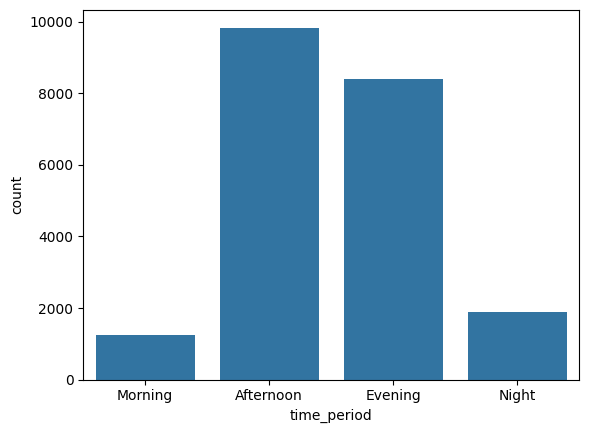

In [13]:
sns.countplot(data = orders, x = "time_period") 
plt.show()

The time of the day, people are ordering more pizzas is: Afternoon.